In [3]:
# Some standard import statements that are nice for Jupyter

# this is necessary for the functions.py file to be imported
# replace the path with the appropriate path to your workspace
import sys
sys.path.append('/ucn/orithyia_data/psi_transmission/scripts')
sys.path.append('/Users/jonahbd/psi_transmission/scripts')


import os
import logging
import ipynb
import decimal
import time
import uncertainties
from uncertainties import *
import numpy as np
from scipy.optimize import curve_fit
logging.basicConfig(level=logging.INFO, stream=sys.stdout)

# prevents the need to reload the kernel everytime functions.py file is updated
%load_ext autoreload
%autoreload 2

# for plotting
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.rcParams['figure.dpi'] = 200

# importing functions for analysis
from functions import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


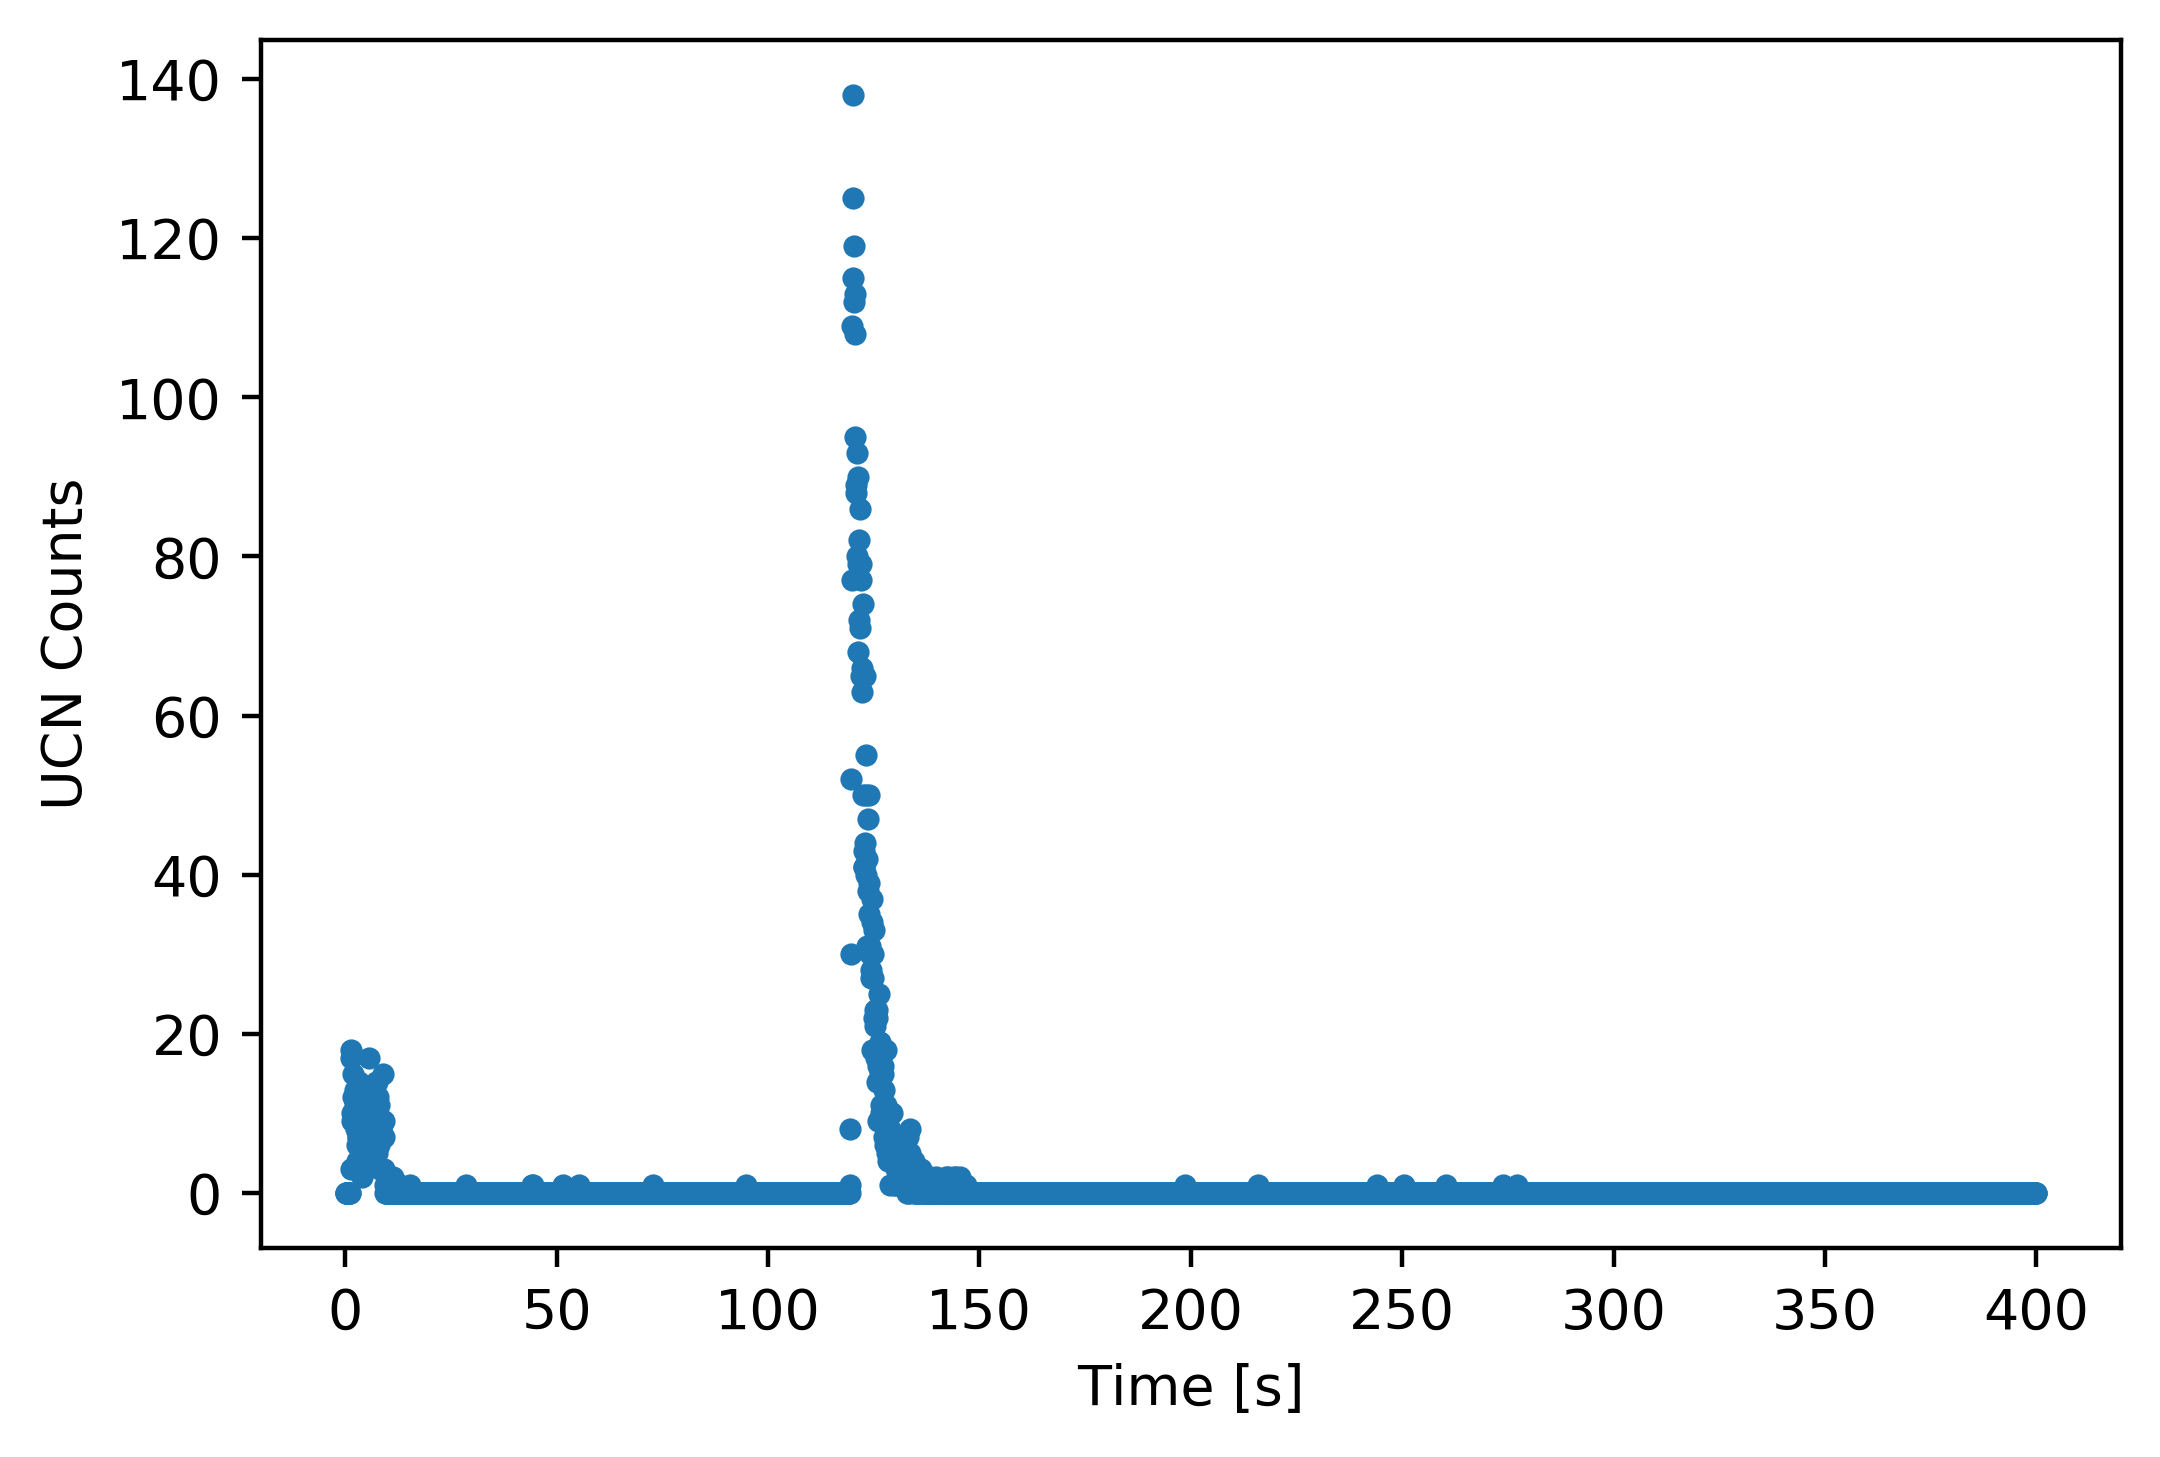

In [11]:
fig, ax = plt.subplots()

data = np.loadtxt("../data_ucn/main_detector/8/T081217_0025.tof", usecols = (0,1));
ax.errorbar(data[:,0] * 0.1, data[:,1], yerr = None, fmt = '.');
ax.set_xlabel('Time [s]');
ax.set_ylabel('UCN Counts');
# plt.title('Dec. 09: Run '')
# plt.show()
fig.savefig('../img/tof_eg.png', dpi=600)

In [21]:
from uncertainties import unumpy

In [32]:
x = ufloat(1, 0.1)
y = ufloat(1, 0.2)
arr = np.array([x,y])
unumpy.matrix.mean(arr)

AttributeError: 'numpy.ndarray' object has no attribute '_collapse'

In [9]:
np.sqrt(0.1**2 + 0.2**2)

0.223606797749979

In [25]:
help(uncertainties.unumpy)

Help on package uncertainties.unumpy in uncertainties:

NAME
    uncertainties.unumpy

DESCRIPTION
    Utilities for NumPy arrays and matrices that contain numbers with
    uncertainties.
    
    This package contains:
    
    1) utilities that help with the creation and manipulation of NumPy
    arrays and matrices of numbers with uncertainties;
    
    2) generalizations of multiple NumPy functions so that they also work
    with arrays that contain numbers with uncertainties.
    
    - Arrays of numbers with uncertainties can be built as follows:
    
      arr = unumpy.uarray([1, 2], [0.01, 0.002])  # (values, uncertainties)
    
    NumPy arrays of numbers with uncertainties can also be built directly
    through NumPy, thanks to NumPy's support of arrays of arbitrary objects:
    
      arr = numpy.array([uncertainties.ufloat(1, 0.1),...])
    
    - Matrices of numbers with uncertainties are best created in one of
    two ways:
    
      mat = unumpy.umatrix(([1, 2], [0.01,

In [35]:
arr = unumpy.umatrix([1, 2], [0.01, 0.002])
np.matrix.mean(arr)

1.5+/-0.005099019513592785

In [31]:
help(uncertainties.unumpy)

Help on package uncertainties.unumpy in uncertainties:

NAME
    uncertainties.unumpy

DESCRIPTION
    Utilities for NumPy arrays and matrices that contain numbers with
    uncertainties.
    
    This package contains:
    
    1) utilities that help with the creation and manipulation of NumPy
    arrays and matrices of numbers with uncertainties;
    
    2) generalizations of multiple NumPy functions so that they also work
    with arrays that contain numbers with uncertainties.
    
    - Arrays of numbers with uncertainties can be built as follows:
    
      arr = unumpy.uarray([1, 2], [0.01, 0.002])  # (values, uncertainties)
    
    NumPy arrays of numbers with uncertainties can also be built directly
    through NumPy, thanks to NumPy's support of arrays of arbitrary objects:
    
      arr = numpy.array([uncertainties.ufloat(1, 0.1),...])
    
    - Matrices of numbers with uncertainties are best created in one of
    two ways:
    
      mat = unumpy.umatrix(([1, 2], [0.01,

In [42]:
# loading the data sets

# main detector
main_dict = load_all_main()

In [53]:
norm_dict = ucn_yield(main_dict, plotting_flag = False);

In [94]:
config = 'NOMI'
run_type = 'shot'

arr = main_dict[config, run_type]

# generate uncertainty array of the run data
uarr = unumpy.umatrix(arr[:,2], arr[:,3])

# generate uncertainty float objects for...

# run time, which has no uncertainty
run_time = unumpy.umatrix(arr[:,0], 0)

# N_0 from the fit of normalization data
N_0 = ufloat(norm_dict[run_type, 'N_0'], norm_dict[run_type, 'N_0_err'])

# y from the fit of normalization data
y = ufloat(norm_dict[run_type, 'y'], norm_dict[run_type, 'y_err'])

# interpolate along the normalization fit for each run start time
uinterp = linear_fit(run_time, 
                   norm_dict[run_type, 'N_0'], 
                   norm_dict[run_type, 'y'])

# get the normalization factor required for each point
unorm = N_0 / uinterp

# normalize the run data
uarr = np.multiply(uarr, unorm)

# update the array values, and hence the dictionary by mutablity in python
arr[:,2] = unumpy.nominal_values(uarr)
arr[:,3] = unumpy.std_devs(uarr)
print(uarr)

[[52061612.7655398+/-86484.61801458904
  400320964.78622097+/-667794.3543096489
  1088699379.0446203+/-1841950.1590148686
  8528542092.312014+/-14523738.40779251
  18824623287.4134+/-32092773.856855642
  79762015432.69171+/-136700042.26365206]]


In [56]:
run_time = unumpy.umatrix(arr[:,0], 0)

In [57]:
run_time

matrix([[77469.0+/-0, 135248.0+/-0, 165487.0+/-0, 209359.0+/-0,
         223785.0+/-0, 248476.0+/-0]], dtype=object)

In [54]:
norm_dict

{('shot', 'N_0'): 5813268.935396963,
 ('shot', 'y'): 13.506766975836866,
 ('shot', 'N_0_err'): 2680.709331324554,
 ('shot', 'y_err'): 0.013657382291764738,
 ('s005', 'N_0'): 121929.67414695457,
 ('s005', 'y'): 0.2409296664900694,
 ('s005', 'N_0_err'): 166.08607113840196,
 ('s005', 'y_err'): 0.0009011676420785878,
 ('s020', 'N_0'): 64106.960572882264,
 ('s020', 'y'): 0.12111801811731962,
 ('s020', 'N_0_err'): 128.75946783534516,
 ('s020', 'y_err'): 0.0006893228379528957,
 ('s100', 'N_0'): 5047.642194469882,
 ('s100', 'y'): 0.008945784881734465,
 ('s100', 'N_0_err'): 24.18044124274554,
 ('s100', 'y_err'): 0.00012515618848340086}

In [ ]:
                # the fits to the nominal configuration data provide
                # a benchmark for percentage loss of absolute counts
                # depending on the time having elapsed since the start
                # of the experiment. 

                denom = linear_fit(run_time, norm_dict[run_type, 'N_0'], 
                                           norm_dict[run_type, 'y'])

                S = norm_dict[run_type, 'N_0'] / denom

                # normalize the counts
                N = N * S

                # compute the uncertainty in the denominator for S, i.e. the 
                # N(t) calculation from the nominal configuration data fit
                N_0_err = norm_dict[run_type, 'N_0_err']
                y_err = norm_dict[run_type, 'y_err']
                denom_err = np.sqrt((N_0_err)**2 + (y_err)**2)

                # calculate the fractional uncertainty in the numerator for S
                N_0_frac_err = N_0_err / norm_dict[run_type, 'N_0']

                # calculate the fractional uncertainty in S
                S_frac_err = np.sqrt((N_0_frac_err)**2 +
                                     (denom_err / denom)**2)

                # calculate the resulting fractional uncertainty in counts

                N_frac_err = np.sqrt((np.sqrt(N) / N)**2 + 
                                                            (S_frac_err)**2)

                # the absolute unceratainty 
                N_err = N_frac_err * N

In [90]:
arr = 5
dict_t = {}
dict_t['some'] = arr

arr = 6

print(arr*2)
print(dict_t['some'])

12
5


In [107]:
data_dict, norm_dict = load_all_main()

In [106]:
data_dict

{('NOMI',
  'shot'): array([[7.74690000e+04, 0.00000000e+00, 5.86817075e+06, 3.03404806e+03,
         8.07600000e+00],
        [1.35248000e+05, 0.00000000e+00, 6.31393451e+06, 4.42109370e+03,
         9.12000000e+00],
        [1.65487000e+05, 0.00000000e+00, 5.22909700e+06, 4.65559165e+03,
         9.17500000e+00],
        [2.09359000e+05, 0.00000000e+00, 5.59045554e+06, 6.74643078e+03,
         1.01220000e+01],
        [2.23785000e+05, 0.00000000e+00, 5.87317507e+06, 7.88757549e+03,
         1.01700000e+01],
        [2.48476000e+05, 0.00000000e+00, 6.13680446e+06, 1.00643498e+04,
         1.02490000e+01]]),
 ('NOMI',
  's005'): array([[6.41080000e+04, 5.00000000e+00, 1.20628720e+05, 3.78123183e+02,
         8.03200000e+00],
        [6.44090000e+04, 5.00000000e+00, 1.20217076e+05, 3.77648685e+02,
         8.03300000e+00],
        [6.47100000e+04, 5.00000000e+00, 1.21089075e+05, 3.79257586e+02,
         8.03400000e+00],
        [6.50100000e+04, 5.00000000e+00, 1.20232870e+05, 3.78061496